#
# Este archivo carga datos de precios historicos de csv y estima el precio total de la obra
#

In [39]:
%run load_csv.py

In [40]:
base_path = "/Users/Curi/DATAKNOWN/Prueba Técnica Cientifico de Datos/Prueba tecnica 1/Datos/"

X = load_csv_data(path = base_path + "X.csv", separation = ",", decimal = ".", reversed = True)
Y = load_csv_data(path = base_path + "Y.csv", separation = ";", decimal = ",", reversed = True)
Z = load_csv_data(path = base_path + "Z.csv", separation = ",", decimal = ".", reversed = False)

<function matplotlib.pyplot.show(close=None, block=None)>

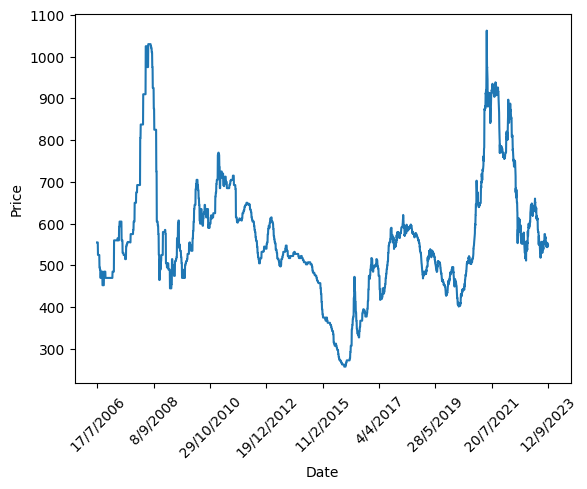

In [48]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# max_date = X["Date"].max()
# max_date = pd.to_datetime(max_date)  # Convert to datetime if needed
# cutoff_date = max_date.replace(year=max_date.year - 6)

# X_6 = X[X["Date"] >= cutoff_date]

plt.plot(Y["Date"],Y["Price"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(Y["Date"][::-int(len(Y) / 8)], rotation=45)
plt.xticks(rotation=45)
plt.show